# 1) Loading the Dataset

In [121]:
import numpy as np
dataset = np.load("HW3 datasets/pca_dataset.npz")

In [122]:
X = dataset['X']
Y = dataset['y']

print("Inputs Shape:", X.shape)
print("Outputs Shape:", Y.shape)

print("\nFirst 5 Inputs:\n", X[:5])
print("\nFIrst 5 Outputs:\n", Y[:5])

print("\nUnique elements in Output:", np.unique(Y))

Inputs Shape: (10000, 1000)
Outputs Shape: (10000,)

First 5 Inputs:
 [[ 0.07063804  0.2480651  -0.03554767 ... -0.01478501 -0.03238071
   0.00124661]
 [ 0.19892553 -0.12916345  0.07560834 ...  0.08264774  0.1304781
   0.08829197]
 [-0.36485586  0.12160725 -0.11612624 ... -0.13388168 -0.20738408
  -0.14825304]
 [-0.18301926  0.44194489 -0.14146543 ... -0.12559521 -0.20704859
  -0.11356397]
 [ 0.14506388  0.00206565  0.03571192 ...  0.04610373  0.06922058
   0.05384415]]

FIrst 5 Outputs:
 [0. 2. 0. 0. 2.]

Unique elements in Output: [0. 2.]


# 2) Analysis of Dataset

The following can be observed from the dataset:<br>
- The dataset contains 10,000 elements.<br>
- The number of variables/attributes in an input is 10,000 (i.e. the dimension of input)<br>
- The output contains just 1 number, whose value is either 0 or 2.<br>

# 3) Training & Evaluating a RandomForestClassifier

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from time import time

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(split.split(X, Y))
train_X, test_X = X[train_index], X[test_index]
train_Y, test_Y = Y[train_index], Y[test_index]

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time()
forest_clf.fit(train_X, train_Y)
print("Time taken to train Random Forest:", time()-start_time, "seconds")

Time taken to train Random Forest: 4.624199151992798 seconds


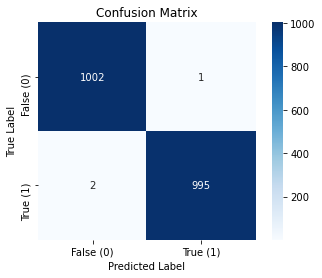

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = forest_clf.predict(test_X)
conf_mat = confusion_matrix(test_Y, y_pred)

labels = ['False (0)', 'True (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [125]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, test_Y)

print("The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Random Forest Classifier (on the test set) is as follows:

True Positives: 995
True Negatives: 1002
False Positives: 1
False Negatives: 2

Precision: 0.998995983935743
Recall: 0.9979939819458375

Accuracy: 0.9985


# 4) Description of Trained Forest

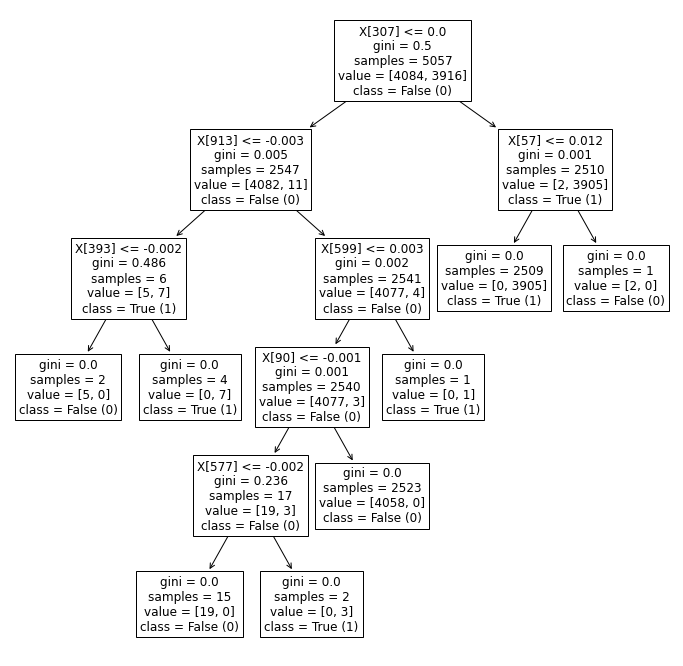

In [126]:
from sklearn.tree import plot_tree

tree = forest_clf.estimators_[0]

plt.figure(figsize=(12,12))
_ = plot_tree(tree, class_names=labels, fontsize=12)
plt.show()

The following points are observable based on the structure of the trained forest:<br>
- Although the training set has 1000 variables, the number of variables used in the Forest seems to be way lesser than that.<br>
- This is probably because the dataset has multiple attributes, which are very dependant on each other, and hence a few attributess maybe more than enough to predict the target attribute.<br>
- The following are the metics of the above displayed decision tree from the random forest & the remaining trees are likely to have similar metics as well:<br>
                        Depth: 5
                        Number of Leaves: 8
                        Number of unique attributes used: 7

# 5) Applying PCA to the dataset

In [127]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
start_time = time()
X_trans = pca.fit_transform(X)
print("Time Taken by PCA to reduce dimensionality:", time()-start_time, "seconds")
print("Number of features after reduction to (minimum of) 95% of variance:", pca.n_components_)
print("Total Preserved Variance:", pca.explained_variance_ratio_.sum())

Time Taken by PCA to reduce dimensionality: 1.9782195091247559 seconds
Number of features after reduction to (minimum of) 95% of variance: 2
Total Preserved Variance: 0.9998866545448817


# 6) Training & Evaluating Random Forest on New Dataset

In [128]:
train_X, test_X = X_trans[train_index], X_trans[test_index]

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time()
forest_clf.fit(train_X, train_Y)
print("Time taken to train Random Forest:", time()-start_time, "seconds")

Time taken to train Random Forest: 0.3312413692474365 seconds


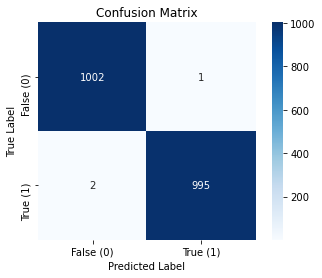

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = forest_clf.predict(test_X)
conf_mat = confusion_matrix(test_Y, y_pred)

labels = ['False (0)', 'True (1)']
ax = plt.axes()
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True, ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [130]:
true_positive = conf_mat[1, 1]
true_negative = conf_mat[0, 0]
false_positive = conf_mat[0, 1]
false_negative = conf_mat[1, 0]
accuracy = accuracy_score(y_pred, test_Y)

print("The Evaluation Metrics of the Random Forest Classifier (on the new test set) is as follows:\n")

print("True Positives:", true_positive)
print("True Negatives:", true_negative)
print("False Positives:", false_positive)
print("False Negatives:", false_negative, end='\n\n')

print("Precision:", true_positive/(true_positive+false_positive))
print("Recall:", true_positive/(true_positive+false_negative), end='\n\n')

print("Accuracy:", accuracy)

The Evaluation Metrics of the Random Forest Classifier (on the new test set) is as follows:

True Positives: 995
True Negatives: 1002
False Positives: 1
False Negatives: 2

Precision: 0.998995983935743
Recall: 0.9979939819458375

Accuracy: 0.9985


# 7) Structure of Newly Trained Forest

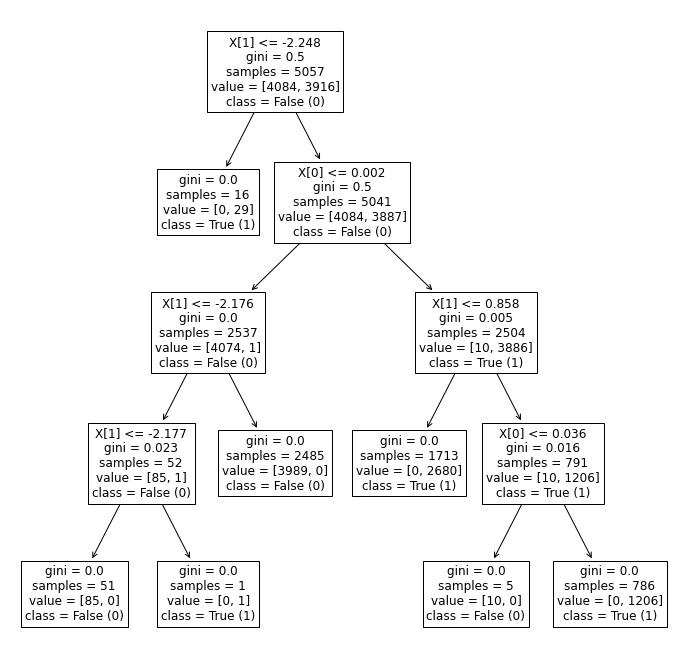

In [131]:
from sklearn.tree import plot_tree

tree = forest_clf.estimators_[0]

plt.figure(figsize=(12,12))
_ = plot_tree(tree, class_names=labels, fontsize=12)
plt.show()

The following points are observable based on the structure of the newly trained forest:<br>
- Both the variables in the new dataset are now well used in the tree.<br>
- The depth of the tree has reduced by 1, possibly due to the reduction of the number of redundant attributes, which caused a redundant selection in the random forest, due to the random attribute samppling step of the Algorithm.<br>
- The number of leaf nodes have also reduced by 2, due to the same reason mentioned above, which has caused the depth of the tree to reduce.
- The following are the new metics are of the new Random Forest trained of the dataset with reduced dimensions:<br>
                        Depth: 4
                        Number of Leaves: 6
                        Number of unique attributes used: 2